In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
# Min value = 0 and Max value = 255

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

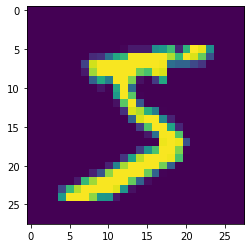

In [7]:
# Pictorial representaion of digits at 0th position.

plt.imshow(X_train[0])

In [8]:
# The above digit seems like "5" and we can verify same by looking at 0th element in y_train.

y_train[0]

5

#### Normalising or Sclaing the data

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [11]:
# The First value was 5, so 1 is enabled at the 5th position.
# Its like one-hot encoding

y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
# We need to convert the value of X_train to values between 0 and 1
# Since its a black and white image know the pixel value will be between 0 and 255
# We can divide it by 255 to get a values between 0 and 1

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [13]:
X_train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
# After Scaling we need to tell whether the image is grey scale or colour image.
# So we need to reshape the X_train to contain one more feature Color channel.
# After reshaping we have Size, Width, Height, and Colour channel.

X_train_scaled = X_train_scaled.reshape(60000, 28, 28, 1)
print(X_train_scaled.shape)

X_test_scaled = X_test_scaled.reshape(10000, 28, 28,1)
print(X_test_scaled.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### Model Creation and Execution

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [17]:
model = Sequential()
# Kernel size modt often (4,4)
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), 
                 padding='valid', input_shape=(28,28,1), activation='relu'))
# Pool size is oftenly half the size of Kernel size
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [19]:
model.fit(X_train_scaled, y_train_cat, validation_data=(X_test_scaled, y_test_cat), 
          epochs=10, callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1329 - accuracy: 0.9602 - val_loss: 0.0485 - val_accuracy: 0.9851
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0406 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.0422 - val_accuracy: 0.9861
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.0336 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0356 - val_accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0415 - val_accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0074 - accuracy: 0.9975 - val_loss: 0.0418 -

#### Evaluation

In [20]:
metrics = pd.DataFrame(model.history.history)

In [21]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.132905,0.960233,0.048540,0.9851
1,0.045549,0.985883,0.040586,0.9862
2,0.030054,0.990600,0.042216,0.9861
3,0.019996,0.993517,0.033627,0.9894
4,0.013951,0.995450,0.035586,0.9891
5,0.010424,0.996583,0.041515,0.9876
6,0.007404,0.997483,0.041811,0.9892


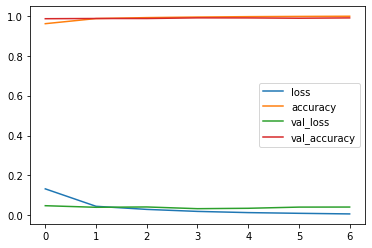

In [22]:
metrics.plot()

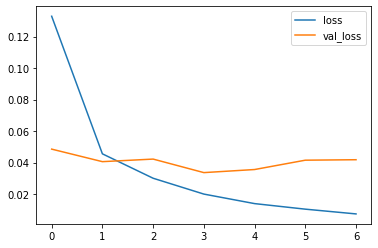

In [26]:
metrics[['loss','val_loss']].plot()

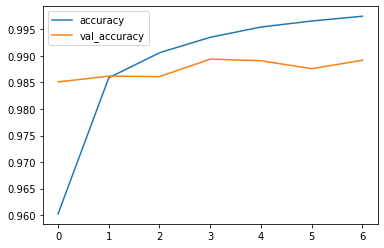

In [29]:
metrics[['accuracy','val_accuracy']].plot()